## reuters 뉴스기사 주제분류(다중클래스분류)

In [1]:
#라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
#reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
train_data,val_data,train_labels,val_labels = train_test_split(train_data, train_labels, test_size = 0.25, random_state=42)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [4]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.(범주형데이터기때문에 수치형데이터로 변환작업)
def one_hot_encoding(data, num_words=10000):#단어의 개수는 10000개로 제한합니다
    results = np.zeros((len(data), num_words))#one_hot_encoding함수는 크기가 (데이터개수,차원의수)인 2차원 배열을 생성하고, 이 배열의 모든 원소를 0으로 초기화한다.
    for i, d in enumerate(data):#enumerate함수를 통해 데이터에 인덱스같이 가져온다.
      results[i, d] = 1.#각 데이터포인트(d)에 해당클래스만 1로 나타내고 나머지는 0으로 둔다.
    return results # 원핫인코딩된 배열을 반환한다.

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [7]:
#모델구성및 컴파일
from tensorflow.keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64, activation = 'relu',  kernel_initializer='he_normal',kernel_regularizer='l2'))#활성화 함수로relu함수를 쓰기때문에he초깃값설정 오버피팅방지규제는 l2규제사용
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64, activation = 'relu',  kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation = 'relu', kernel_initializer='he_normal',kernel_regularizer='l2'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [8]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',#각 클래스에대한 레이블을 예측해야함
              metrics=['accuracy'])#분류문제니 평가지표로 정확도 선택

history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/15
211/211 [==============================] - 3s 7ms/step - loss: 8.5500 - accuracy: 0.3656 - val_loss: 6.9430 - val_accuracy: 0.4849
Epoch 2/15
211/211 [==============================] - 1s 5ms/step - loss: 6.5911 - accuracy: 0.5156 - val_loss: 5.8541 - val_accuracy: 0.5784
Epoch 3/15
211/211 [==============================] - 1s 5ms/step - loss: 5.7809 - accuracy: 0.5616 - val_loss: 5.3552 - val_accuracy: 0.5971
Epoch 4/15
211/211 [==============================] - 1s 5ms/step - loss: 5.2592 - accuracy: 0.5926 - val_loss: 4.9714 - val_accuracy: 0.6291
Epoch 5/15
211/211 [==============================] - 1s 4ms/step - loss: 4.9521 - accuracy: 0.6253 - val_loss: 4.7900 - val_accuracy: 0.6576
Epoch 6/15
211/211 [==============================] - 1s 5ms/step - loss: 4.4835 - accuracy: 0.6473 - val_loss: 4.3694 - val_accuracy: 0.6656
Epoch 7/15
211/211 [==============================] - 1s 5ms/step - loss: 4.2473 - accuracy: 0.6663 - val_loss: 4.2644 - val_accuracy: 0.6679
Epoch 

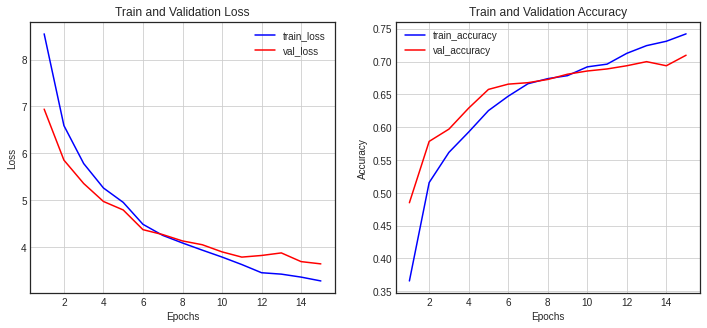

In [9]:
#시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [10]:
#모델 평가및 예측
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 3.8921 - accuracy: 0.6963


[3.8920793533325195, 0.6963490843772888]